In [14]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Read the Mapbox API key
load_dotenv("joanne.env")
map_box_api = os.getenv("MAPBOX")
type(map_box_api)

NoneType

In [16]:
# Read the seattle housing price data into a Pandas DataFrame
file_path = Path("housing_price_year_clean.csv")
sea_data = pd.read_csv(file_path, index_col="Year of Period End")
sea_data.tail(10)

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year of Period End,,,,,,,,
2021,"Woodinville, WA",$901K,59,73,41,11,0,-22
2020,"Woodinville, WA",$884K,641,645,473,123,-3,-18
2018,"Woodinville, WA",$828K,694,811,"1,094",202,2,5
2019,"Woodinville, WA",$812K,696,723,"1,136",334,0,11
2017,"Woodinville, WA",$707K,738,772,713,145,-1,-4
2016,"Woodinville, WA",$647K,698,769,891,191,-1,-7
2015,"Woodinville, WA",$556K,714,730,"1,091",278,-1,-1
2014,"Woodinville, WA",$515K,617,763,"1,357",292,0,0
2013,"Woodinville, WA",$498K,651,737,"1,278",295,0,-23


In [17]:
print(sea_data.dtypes)

Region                object
Median Sale Price     object
Homes Sold            object
New Listings          object
Inventory             object
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object


In [18]:
# Fix Data Types
#sea_data['Median Sale Price']=sea_data["Median Sale Price"].astype("string")

In [19]:
#sea_data.dtypes

In [20]:
sea_data['Median Sale Price'] = sea_data['Median Sale Price'].str.replace("$","")
sea_data['Median Sale Price'] = sea_data['Median Sale Price'].str.replace("K","")
sea_data['Median Sale Price'] = sea_data['Median Sale Price'].str.replace(",","").astype("float")
sea_data['Median Sale Price'] = sea_data['Median Sale Price']*1000
sea_data.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year of Period End,,,,,,,,
2021,"Auburn, WA",486000.0,186,252,109,11,-1,-11
2020,"Auburn, WA",460000.0,"1,755","1,823","1,515",104,-1,-8
2019,"Auburn, WA",415000.0,"1,639","1,658","2,122",200,-3,-1
2018,"Auburn, WA",388000.0,"1,756","1,976","2,682",211,2,-2
2017,"Auburn, WA",358000.0,"1,962","2,062","2,542",231,0,-1


In [21]:
sea_data['Region'] = sea_data['Region'].str.rstrip(', WA')
sea_data.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year of Period End,,,,,,,,
2021,Auburn,486000.0,186,252,109,11,-1,-11
2020,Auburn,460000.0,"1,755","1,823","1,515",104,-1,-8
2019,Auburn,415000.0,"1,639","1,658","2,122",200,-3,-1
2018,Auburn,388000.0,"1,756","1,976","2,682",211,2,-2
2017,Auburn,358000.0,"1,962","2,062","2,542",231,0,-1


In [35]:
housing_price = sea_data["Median Sale Price"].groupby(["Year of Period End"]).mean()
housing_price

Year of Period End
2012    314945.945946
2013    352756.756757
2014    384162.162162
2015    419135.135135
2016    469054.054054
2017    541513.513514
2018    593675.675676
2019    598081.081081
2020    655297.297297
2021    704567.567568
Name: Median Sale Price, dtype: float64

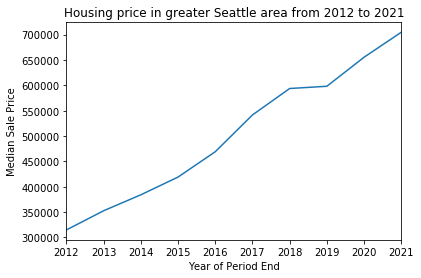

In [36]:
# Use the Pandas plot function to plot the average housing price per year.
figure_housing_price = plt.figure()
plot_figure_price = housing_price.plot()
plot_figure_price.set_xlabel('Year of Period End')
plot_figure_price.set_ylabel('Median Sale Price')
plot_figure_price.set_title('Housing price in greater Seattle area from 2012 to 2021')

plt.show()
plt.close(figure_housing_price)

In [37]:
# group by year and region
sea_data_df = sea_data.groupby([sea_data.index,"Region"]).sum()
sea_data_df.reset_index(inplace=True)
sea_data_df.rename(columns = {'Year of Period End': 'Year'},inplace = True)
sea_data_df.head()


,Year,Region,Median Sale Price,Days on Market,Days on Market MoM,Days on Market YoY
0,2012,Auburn,217000.0,743,-2,-15
1,2012,Bainbridge Island,464000.0,857,-8,-16
2,2012,Bellevue,473000.0,333,-4,-27
3,2012,Bothell,322000.0,438,-6,-33
4,2012,Brier,366000.0,944,-4,13


In [38]:
# Getting the data from the top 10 expensive cities
top10_expensive_cities = sea_data.groupby(["Region"]).mean()
top10_expensive_cities = top10_expensive_cities.sort_values(['Median Sale Price'], ascending =False)
top10_expensive_cities = top10_expensive_cities.reset_index().head(10)
top10_expensive_cities

,Region,Median Sale Price,Days on Market,Days on Market MoM,Days on Market YoY
0,Mercer Island,1292700.0,259.2,-1.4,-9.4
1,Sammamish,831500.0,204.6,-0.9,-7.7
2,Bellevue,760600.0,164.4,-0.6,-6.0
3,Newcastle,712800.0,255.4,-0.5,-8.7
4,Redmond,702900.0,180.0,-0.8,-7.9
5,Bainbridge Island,697700.0,365.7,-2.1,-13.1
6,Woodinville,678700.0,233.9,-0.9,-8.9
7,Kirkland,653500.0,174.7,-0.8,-6.0
8,Issaquah,607800.0,198.3,-0.7,-8.2
9,Snoqualmie,606500.0,245.6,-1.3,-10.6


In [26]:
# Plotting the data from the top 10 expensive cities
top10_expensive_cities.hvplot.bar(
    x = "Region",
    y = "Median Sale Price",
    xlabel='Region',
    ylabel='Median sale Price',
    title = "Top 10 Expensive Cities in SEA",
    height=450,
    rot = 90
)

:Bars   [Region]   (Median Sale Price)

In [30]:
# Plotting the data from the top 10 expensive cities
sea_data_df.hvplot(
    x = "Year",
    y = "Median Sale Price",
    xlabel='Year',
    ylabel='Median sale Price',
    title = "Seattle's housing price growth by Region",
    height=450,
    rot = 90,
    groupby='Region'
    
)

:DynamicMap   [Region]
   :Curve   [Year]   (Median Sale Price)

In [42]:
sea_data_df.head()

,Year,Region,Median Sale Price,Days on Market,Days on Market MoM,Days on Market YoY
0,2012,Auburn,217000.0,743,-2,-15
1,2012,Bainbridge Island,464000.0,857,-8,-16
2,2012,Bellevue,473000.0,333,-4,-27
3,2012,Bothell,322000.0,438,-6,-33
4,2012,Brier,366000.0,944,-4,13


In [52]:
new_sea_data = sea_data_df.iloc[:,0:3]
new_sea_data.head(10)

,Year,Region,Median Sale Price
0,2012,Auburn,217000.0
1,2012,Bainbridge Island,464000.0
2,2012,Bellevue,473000.0
3,2012,Bothell,322000.0
4,2012,Brier,366000.0
5,2012,Burien,207000.0
6,2012,Des Moines,173000.0
7,2012,DuPont,266000.0
8,2012,Edmonds,323000.0
9,2012,Everett,202000.0


In [53]:
new_sea_data = column

:DynamicMap   [Region]
   :Curve   [Year]   (Median Sale Price)